Loading the IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

Decoding reviews to text

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preparing the data

Encoding the integer sequences via multi-hot encoding

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### **Model with various configurations**

1. Base Model

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

2. Model with 1 hidden layer (model_1_HL)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # Building the model with 1 hidden layer
    layers.Dense(1, activation="sigmoid")
])

model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

3. Model with 3 hidden layers (model_3_hl)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # hidden layer 1
    layers.Dense(16, activation="relu"), # hidden layer 2
    layers.Dense(16, activation="relu"), # hidden layer 3
    layers.Dense(1, activation="sigmoid")
])

model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

4. Model with fewer hidden units 32 (model_32_HU)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(32, activation="relu"), # hidden units 32
    layers.Dense(1, activation="sigmoid")
    ])

model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

5. Model with higher hidden units 64 (model64_HU)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(64, activation="relu"), # hidden units 64
    layers.Dense(1, activation="sigmoid")
    ])

model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

6. Model with mse loss function (model_mse)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


7. Model with tanh activation

In [15]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

8. Regularized Model (model_reg)

In [16]:
from tensorflow.keras import regularizers

model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])

model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

9. Model with dropout (model_drp)

In [17]:
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model_drp.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Creating a validation set

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### **Model Training**

1. Base Model

In [19]:
Base_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6622 - loss: 0.6331 - val_accuracy: 0.8568 - val_loss: 0.4434
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8850 - loss: 0.3756 - val_accuracy: 0.8826 - val_loss: 0.3225
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9175 - loss: 0.2604 - val_accuracy: 0.8887 - val_loss: 0.2874
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9398 - loss: 0.1935 - val_accuracy: 0.8736 - val_loss: 0.3145
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9530 - loss: 0.1580 - val_accuracy: 0.8853 - val_loss: 0.2839
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9594 - loss: 0.1346 - val_accuracy: 0.8733 - val_loss: 0.3190
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9667 - loss: 0.1159 - val_accuracy: 0.8849 - val_loss: 0.3030
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9748 - loss: 0.0917 - val_accuracy: 0.8830 - v

In [20]:
Base_model_dict = Base_model.history
Base_model_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

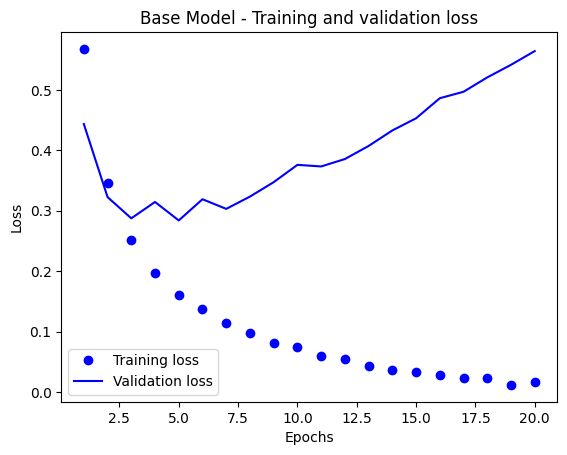

In [21]:
import matplotlib.pyplot as plt
Base_model_dict = Base_model.history
loss_values_0 = Base_model_dict["loss"]
val_loss_values_0 = Base_model_dict["val_loss"]
epochs = range(1, len(loss_values_0) + 1)
plt.plot(epochs, loss_values_0, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_0, "b", label="Validation loss")
plt.title("Base Model - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

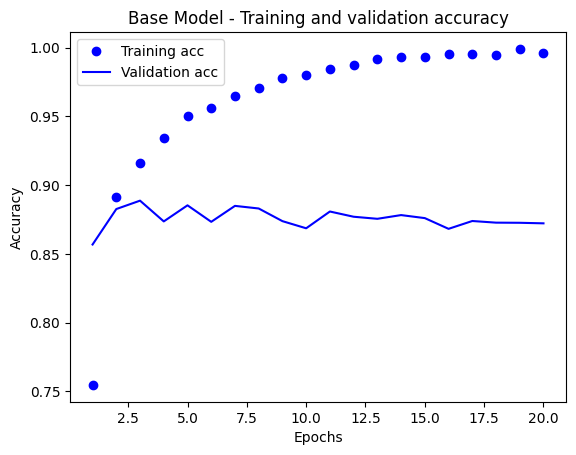

In [22]:
plt.clf()
acc_0 = Base_model_dict["accuracy"]
val_acc_0 = Base_model_dict["val_accuracy"]
plt.plot(epochs, acc_0, "bo", label="Training acc")
plt.plot(epochs, val_acc_0, "b", label="Validation acc")
plt.title("Base Model - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [23]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
Base_model_results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6942 - loss: 0.5835
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8976 - loss: 0.2968
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9233 - loss: 0.2190
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9399 - loss: 0.1743
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.2902


In [24]:
Base_model_results

[0.28930649161338806, 0.8832799792289734]

Predictions

In [25]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step


array([[0.20052755],
       [0.9999643 ],
       [0.89107907],
       ...,
       [0.08803749],
       [0.0890219 ],
       [0.50929415]], dtype=float32)


2. Model With 1 Hidden Layer

In [26]:
Model_1_Hidden_Layer = model_1_HL.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7097 - loss: 0.5853 - val_accuracy: 0.8686 - val_loss: 0.4051
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8947 - loss: 0.3559 - val_accuracy: 0.8691 - val_loss: 0.3417
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9169 - loss: 0.2746 - val_accuracy: 0.8827 - val_loss: 0.3039
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9253 - loss: 0.2307 - val_accuracy: 0.8905 - val_loss: 0.2842
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9389 - loss: 0.1995 - val_accuracy: 0.8880 - val_loss: 0.2771
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9462 - loss: 0.1779 - val_accuracy: 0.8877 - val_loss: 0.2750
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9509 - loss: 0.1609 - val_accuracy: 0.8860 - val_loss: 0.2755
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9588 - loss: 0.1460 - val_accuracy: 0.8808 - v

In [27]:
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_1_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

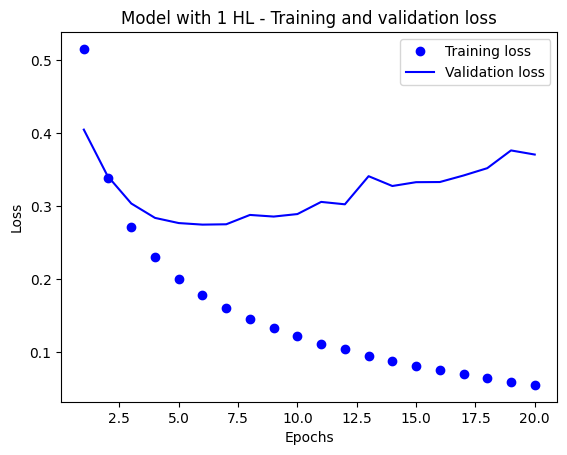

In [28]:
import matplotlib.pyplot as plt
Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
loss_values_1 = Model_1_Hidden_Layer_dict["loss"]
val_loss_values_1 = Model_1_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_1) + 1)
plt.plot(epochs, loss_values_1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_1, "b", label="Validation loss")
plt.title("Model with 1 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

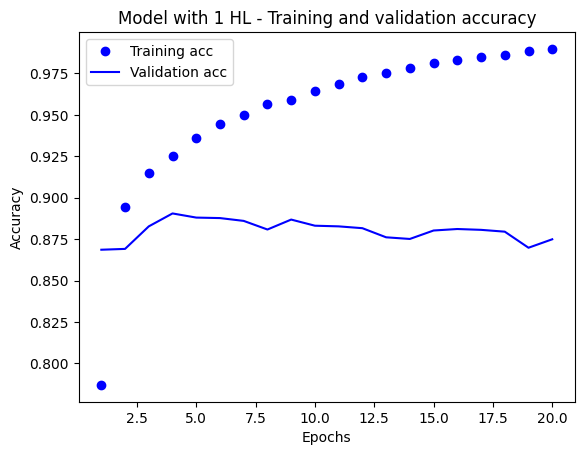

In [29]:
plt.clf()
acc_1 = Model_1_Hidden_Layer_dict["accuracy"]
val_acc_1 = Model_1_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_1, "bo", label="Training acc")
plt.plot(epochs, val_acc_1, "b", label="Validation acc")
plt.title("Model with 1 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [30]:
model_1_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_1_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_1_HL.fit(x_train, y_train, epochs=4, batch_size=512)
Model_1_Hidden_Layer_Results = model_1_HL.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7389 - loss: 0.5410
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9016 - loss: 0.2956
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9209 - loss: 0.2335
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9311 - loss: 0.2010
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8879 - loss: 0.2800


In [31]:
Model_1_Hidden_Layer_Results

[0.27956831455230713, 0.8889600038528442]

Predictions

In [32]:
model_1_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step


array([[0.24701223],
       [0.9997432 ],
       [0.74752194],
       ...,
       [0.1208278 ],
       [0.08967137],
       [0.52894634]], dtype=float32)

2. Model With 3 Hidden Layer

In [33]:
Model_3_Hidden_Layer = model_3_HL.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6415 - loss: 0.6378 - val_accuracy: 0.8502 - val_loss: 0.4349
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8839 - loss: 0.3697 - val_accuracy: 0.8756 - val_loss: 0.3262
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9177 - loss: 0.2546 - val_accuracy: 0.8884 - val_loss: 0.2813
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9366 - loss: 0.1940 - val_accuracy: 0.8854 - val_loss: 0.2845
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9530 - loss: 0.1503 - val_accuracy: 0.8797 - val_loss: 0.3077
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9567 - loss: 0.1311 - val_accuracy: 0.8828 - val_loss: 0.2981
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9746 - loss: 0.0974 - val_accuracy: 0.8698 - val_loss: 0.3529
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9746 - loss: 0.0853 - val_accuracy: 0.8831 - v

In [34]:
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

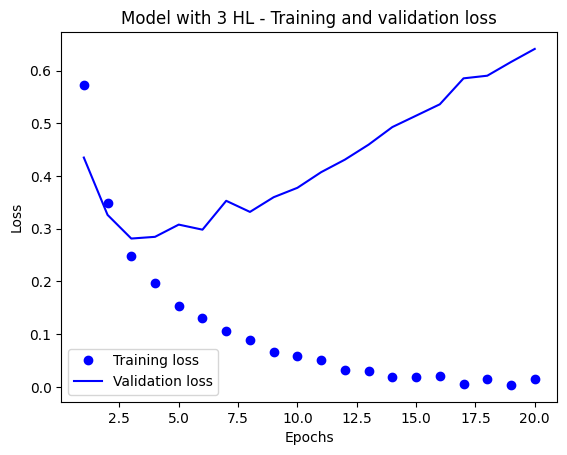

In [35]:
import matplotlib.pyplot as plt
Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
loss_values_3 = Model_3_Hidden_Layer_dict["loss"]
val_loss_values_3 = Model_3_Hidden_Layer_dict["val_loss"]
epochs = range(1, len(loss_values_3) + 1)
plt.plot(epochs, loss_values_3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_3, "b", label="Validation loss")
plt.title("Model with 3 HL - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

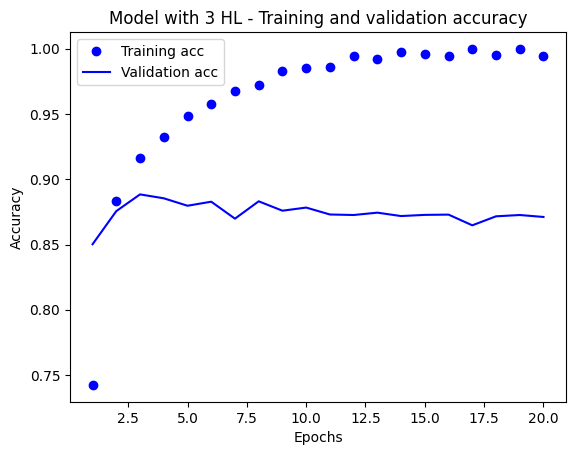

In [36]:
plt.clf()
acc_3 = Model_3_Hidden_Layer_dict["accuracy"]
val_acc_3 = Model_3_Hidden_Layer_dict["val_accuracy"]
plt.plot(epochs, acc_3, "bo", label="Training acc")
plt.plot(epochs, val_acc_3, "b", label="Validation acc")
plt.title("Model with 3 HL - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [37]:
model_3_HL = keras.Sequential([
    layers.Dense(16, activation="relu"), # 1 Hidden Layer
    layers.Dense(16, activation="relu"), # 2 Hidden Layer
    layers.Dense(16, activation="relu"), # 3 Hidden Layer
    layers.Dense(1, activation="sigmoid")
])
model_3_HL.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_3_HL.fit(x_train, y_train, epochs=6, batch_size=512) # Epochs selected 6 because it starts to dip from 7
Model_3_Hidden_Layer_Results = model_3_HL.evaluate(x_test, y_test)

Epoch 1/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7399 - loss: 0.5647
Epoch 2/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8984 - loss: 0.2881
Epoch 3/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9249 - loss: 0.2102
Epoch 4/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9374 - loss: 0.1724
Epoch 5/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9475 - loss: 0.1494
Epoch 6/6
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9560 - loss: 0.1273
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8757 - loss: 0.3360


In [38]:
Model_3_Hidden_Layer_Results

[0.3324761390686035, 0.8776400089263916]

Predictions

In [39]:
model_3_HL.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step


array([[0.10691544],
       [0.9999927 ],
       [0.7307757 ],
       ...,
       [0.09161345],
       [0.03029524],
       [0.7180867 ]], dtype=float32)

4. Model With 32 Hidden Units

In [40]:
Model_32_Hidden_Units = model_32_HU.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7008 - loss: 0.5991 - val_accuracy: 0.8514 - val_loss: 0.3953
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8842 - loss: 0.3379 - val_accuracy: 0.8771 - val_loss: 0.3142
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9209 - loss: 0.2379 - val_accuracy: 0.8895 - val_loss: 0.2776
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9313 - loss: 0.1928 - val_accuracy: 0.8895 - val_loss: 0.2761
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9487 - loss: 0.1566 - val_accuracy: 0.8682 - val_loss: 0.3253
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9561 - loss: 0.1337 - val_accuracy: 0.8638 - val_loss: 0.3569
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9633 - loss: 0.1159 - val_accuracy: 0.8781 - val_loss: 0.3158
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9739 - loss: 0.0904 - val_accuracy: 0.8833 - v

In [41]:
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_32_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

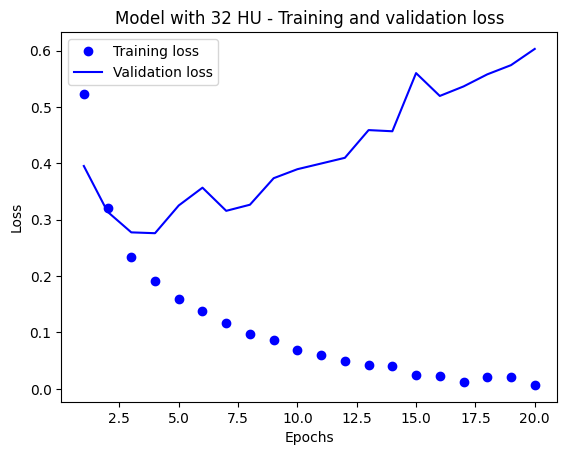

In [42]:
import matplotlib.pyplot as plt
Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
loss_values_32 = Model_32_Hidden_Units_dict["loss"]
val_loss_values_32 = Model_32_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_32) + 1)
plt.plot(epochs, loss_values_32, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_32, "b", label="Validation loss")
plt.title("Model with 32 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

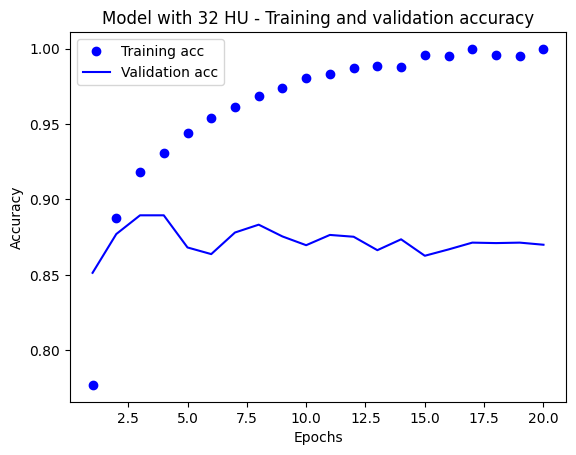

In [43]:
plt.clf()
acc_32 = Model_32_Hidden_Units_dict["accuracy"]
val_acc_32 = Model_32_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_32, "bo", label="Training acc")
plt.plot(epochs, val_acc_32, "b", label="Validation acc")
plt.title("Model with 32 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [44]:
model_32_HU = keras.Sequential([
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(32, activation="relu"), # 32 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_32_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_32_HU.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_32_Hidden_Units_Results = model_32_HU.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7190 - loss: 0.5637
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9004 - loss: 0.2815
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9236 - loss: 0.2098
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8875 - loss: 0.2799


In [45]:
Model_32_Hidden_Units_Results

[0.2790932059288025, 0.8893600106239319]

Prediction

In [46]:
model_32_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.2457052 ],
       [0.99894094],
       [0.8264511 ],
       ...,
       [0.11719771],
       [0.10447034],
       [0.7143228 ]], dtype=float32)

5. Model With 64 Hidden Units

In [47]:
Model_64_Hidden_Units = model_64_HU.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.6919 - loss: 0.5906 - val_accuracy: 0.8388 - val_loss: 0.3827
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8829 - loss: 0.3120 - val_accuracy: 0.7926 - val_loss: 0.4777
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9128 - loss: 0.2310 - val_accuracy: 0.8715 - val_loss: 0.3131
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9247 - loss: 0.1946 - val_accuracy: 0.8866 - val_loss: 0.2846
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9469 - loss: 0.1440 - val_accuracy: 0.8865 - val_loss: 0.2896
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9614 - loss: 0.1147 - val_accuracy: 0.8853 - val_loss: 0.3065
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9753 - loss: 0.0842 - val_accuracy: 0.8824 - val_loss: 0.3244
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9754 - loss: 0.0859 - val_accuracy: 0.8643 - v

In [48]:
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

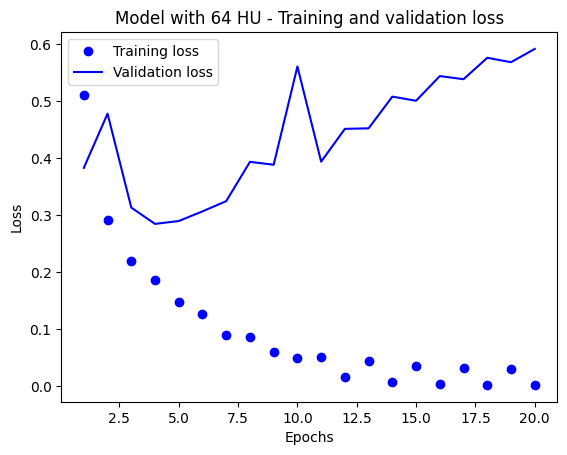

In [49]:
import matplotlib.pyplot as plt
Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
loss_values_64 = Model_64_Hidden_Units_dict["loss"]
val_loss_values_64 = Model_64_Hidden_Units_dict["val_loss"]
epochs = range(1, len(loss_values_64) + 1)
plt.plot(epochs, loss_values_64, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_64, "b", label="Validation loss")
plt.title("Model with 64 HU - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

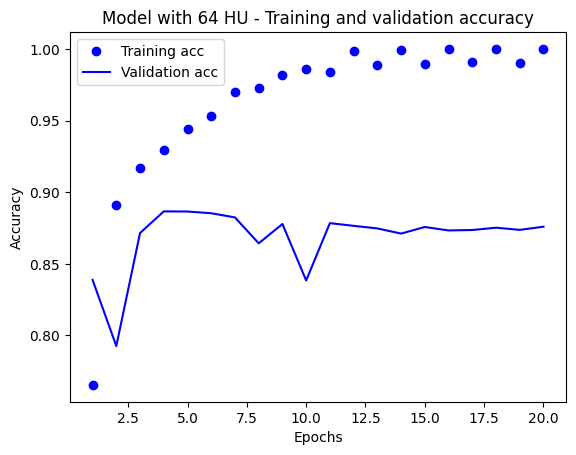

In [50]:
plt.clf()
acc_64 = Model_64_Hidden_Units_dict["accuracy"]
val_acc_64 = Model_64_Hidden_Units_dict["val_accuracy"]
plt.plot(epochs, acc_64, "bo", label="Training acc")
plt.plot(epochs, val_acc_64, "b", label="Validation acc")
plt.title("Model with 64 HU - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [51]:
model_64_HU = keras.Sequential([
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(64, activation="relu"), # 64 Hidden Units
    layers.Dense(1, activation="sigmoid")
])
model_64_HU.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_64_HU.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_64_Hidden_Units_Results = model_64_HU.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7157 - loss: 0.5539
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8988 - loss: 0.2686
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3264


In [52]:
Model_64_Hidden_Units_Results

[0.3220630884170532, 0.8677200078964233]

Prediction

In [53]:
model_64_HU.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.373965  ],
       [0.9975057 ],
       [0.97378993],
       ...,
       [0.15398465],
       [0.1739576 ],
       [0.6458686 ]], dtype=float32)

5. Model With MSE Loss

In [54]:
Model_MSE_LOSS = model_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6689 - loss: 0.2116 - val_accuracy: 0.8653 - val_loss: 0.1232
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8888 - loss: 0.1053 - val_accuracy: 0.8416 - val_loss: 0.1174
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9131 - loss: 0.0779 - val_accuracy: 0.8755 - val_loss: 0.0950
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9300 - loss: 0.0632 - val_accuracy: 0.8867 - val_loss: 0.0842
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9440 - loss: 0.0525 - val_accuracy: 0.8601 - val_loss: 0.1029
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9502 - loss: 0.0461 - val_accuracy: 0.8813 - val_loss: 0.0888
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9634 - loss: 0.0379 - val_accuracy: 0.8816 - val_loss: 0.0839
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9683 - loss: 0.0340 - val_accuracy: 0.8820 - v

In [55]:
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

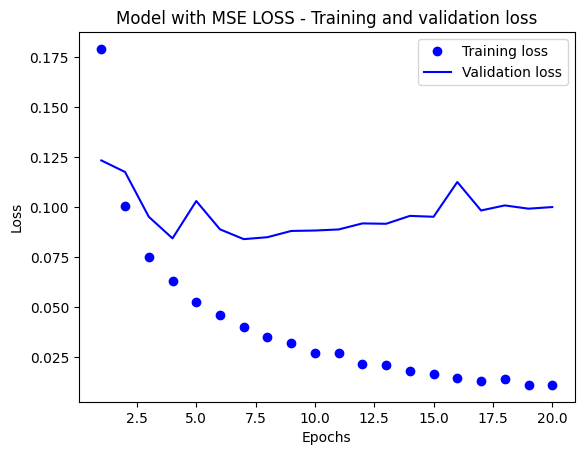

In [56]:
import matplotlib.pyplot as plt
Model_MSE_LOSS_dict = Model_MSE_LOSS.history
loss_values_MSE = Model_MSE_LOSS_dict["loss"]
val_loss_values_MSE = Model_MSE_LOSS_dict["val_loss"]
epochs = range(1, len(loss_values_MSE) + 1)
plt.plot(epochs, loss_values_MSE, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_MSE, "b", label="Validation loss")
plt.title("Model with MSE LOSS - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

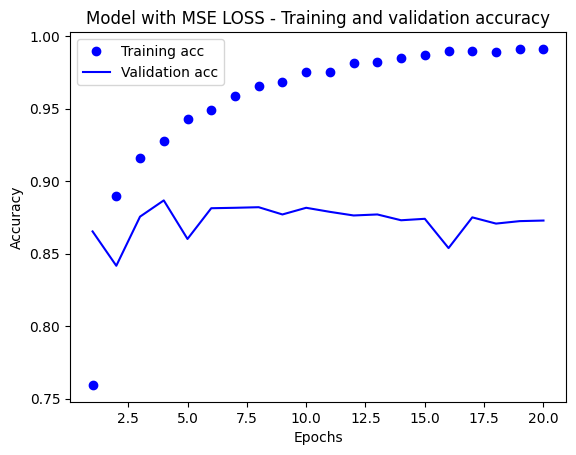

In [57]:
plt.clf()
acc_MSE = Model_MSE_LOSS_dict["accuracy"]
val_acc_MSE = Model_MSE_LOSS_dict["val_accuracy"]
plt.plot(epochs, acc_MSE, "bo", label="Training acc")
plt.plot(epochs, val_acc_MSE, "b", label="Validation acc")
plt.title("Model with MSE LOSS - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [58]:
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_mse.compile(optimizer="rmsprop",
              loss="mse", # MSE Loss Function
              metrics=["accuracy"])
model_mse.fit(x_train, y_train, epochs=4, batch_size=512) # Epochs selected 2 because it starts to dip from 2
Model_MSE_LOSS_Results = model_mse.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7024 - loss: 0.2078
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8882 - loss: 0.1015
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9097 - loss: 0.0747
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9259 - loss: 0.0631
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8845 - loss: 0.0860


In [59]:
Model_MSE_LOSS_Results

[0.08590194582939148, 0.884880006313324]

Prediction

In [60]:
model_mse.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step


array([[0.17856714],
       [0.9975492 ],
       [0.73475045],
       ...,
       [0.10269893],
       [0.10485864],
       [0.4965914 ]], dtype=float32)

6. Model With tanh activation

In [61]:
Model_TANH_ACT = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7043 - loss: 0.5514 - val_accuracy: 0.8634 - val_loss: 0.3539
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9061 - loss: 0.2785 - val_accuracy: 0.8854 - val_loss: 0.2835
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9297 - loss: 0.1979 - val_accuracy: 0.8768 - val_loss: 0.2977
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9472 - loss: 0.1559 - val_accuracy: 0.8859 - val_loss: 0.2841
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9611 - loss: 0.1158 - val_accuracy: 0.8839 - val_loss: 0.3058
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9737 - loss: 0.0866 - val_accuracy: 0.8799 - val_loss: 0.3326
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9689 - loss: 0.0884 - val_accuracy: 0.8779 - val_loss: 0.3666
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9844 - loss: 0.0545 - val_accuracy: 0.8732 - v

In [62]:
Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

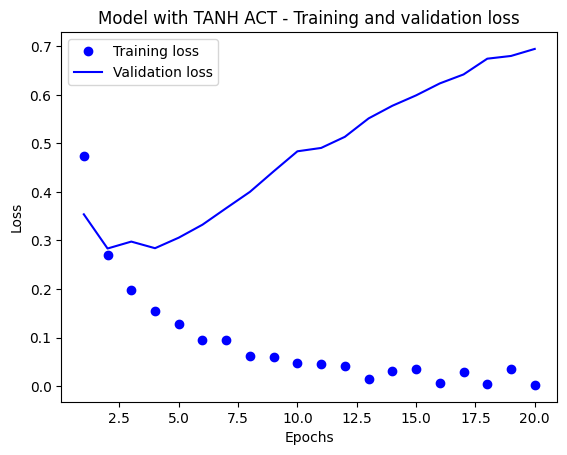

In [63]:
import matplotlib.pyplot as plt
Model_TANH_ACT_dict = Model_TANH_ACT.history
loss_values_TANH = Model_TANH_ACT_dict["loss"]
val_loss_values_TANH = Model_TANH_ACT_dict["val_loss"]
epochs = range(1, len(loss_values_TANH) + 1)
plt.plot(epochs, loss_values_TANH, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_TANH, "b", label="Validation loss")
plt.title("Model with TANH ACT - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

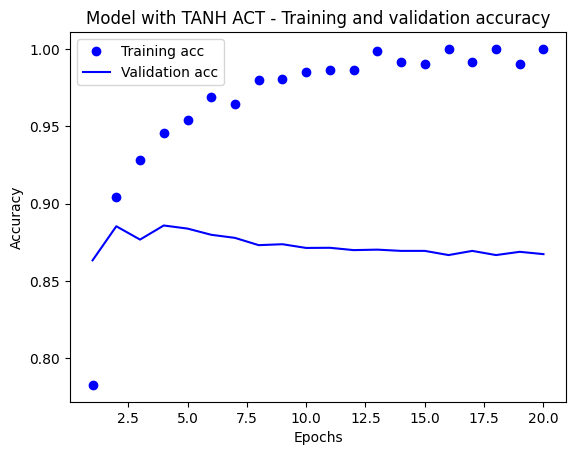

In [64]:
plt.clf()
acc_TANH = Model_TANH_ACT_dict["accuracy"]
val_acc_TANH = Model_TANH_ACT_dict["val_accuracy"]
plt.plot(epochs, acc_TANH, "bo", label="Training acc")
plt.plot(epochs, val_acc_TANH, "b", label="Validation acc")
plt.title("Model with TANH ACT - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [65]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(16, activation="tanh"), # tanh activation
    layers.Dense(1, activation="sigmoid")
])
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_tanh.fit(x_train, y_train, epochs=3, batch_size=512) # Epochs selected 3 because it starts to dip from 3
Model_TANH_ACT_Results = model_tanh.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7455 - loss: 0.5388
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9069 - loss: 0.2599
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9295 - loss: 0.1947
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8827 - loss: 0.2854


In [66]:
Model_TANH_ACT_Results

[0.28239673376083374, 0.8858000040054321]

Prediction

In [67]:
model_tanh.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step


array([[0.17090046],
       [0.996315  ],
       [0.9362668 ],
       ...,
       [0.09164411],
       [0.05860977],
       [0.6568578 ]], dtype=float32)

7. Model With L2 Regularization

In [68]:
Model_Reg_Tech = model_reg.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7020 - loss: 0.6616 - val_accuracy: 0.8636 - val_loss: 0.4689
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8898 - loss: 0.4110 - val_accuracy: 0.8818 - val_loss: 0.3761
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9077 - loss: 0.3222 - val_accuracy: 0.8888 - val_loss: 0.3437
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9317 - loss: 0.2668 - val_accuracy: 0.8868 - val_loss: 0.3370
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9396 - loss: 0.2417 - val_accuracy: 0.8874 - val_loss: 0.3302
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9471 - loss: 0.2205 - val_accuracy: 0.8868 - val_loss: 0.3328
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9543 - loss: 0.2041 - val_accuracy: 0.8814 - val_loss: 0.3424
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9623 - loss: 0.1849 - val_accuracy: 0.8670 - v

In [69]:
Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

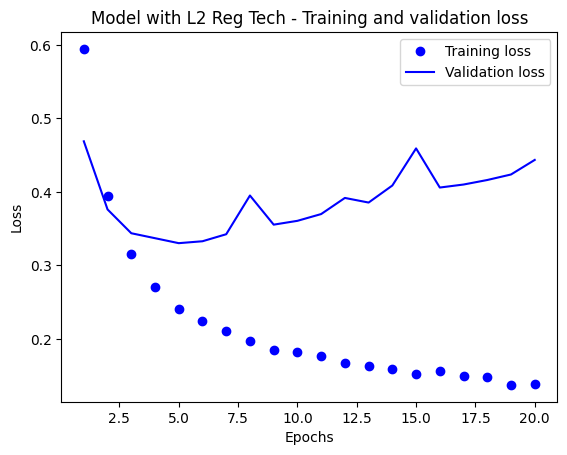

In [70]:
import matplotlib.pyplot as plt
Model_Reg_Tech_dict = Model_Reg_Tech.history
loss_values_Reg = Model_Reg_Tech_dict["loss"]
val_loss_values_Reg = Model_Reg_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Reg) + 1)
plt.plot(epochs, loss_values_Reg, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Reg, "b", label="Validation loss")
plt.title("Model with L2 Reg Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

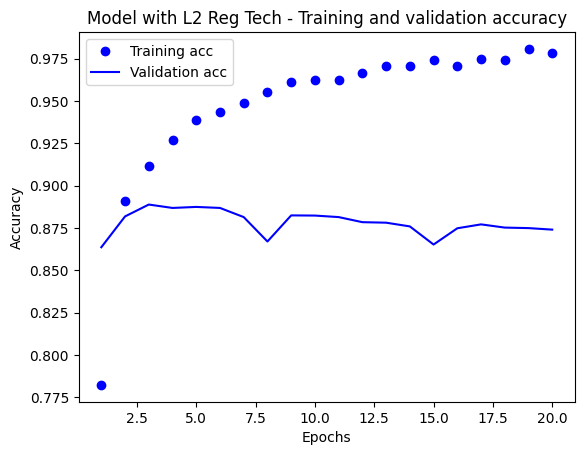

In [71]:
plt.clf()
acc_Reg = Model_Reg_Tech_dict["accuracy"]
val_acc_Reg = Model_Reg_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Reg, "bo", label="Training acc")
plt.plot(epochs, val_acc_Reg, "b", label="Validation acc")
plt.title("Model with L2 Reg Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [72]:
model_reg = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)), # Applied L2 regularization (0.001 - common accepted value)
    layers.Dense(1, activation="sigmoid")
])
model_reg.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_reg.fit(x_train, y_train, epochs=2, batch_size=512) # Epochs selected 2 because it starts to dip from 3
Model_Reg_Tech_Results = model_reg.evaluate(x_test, y_test)

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7312 - loss: 0.6159
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9005 - loss: 0.3504
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8852 - loss: 0.3471


In [73]:
Model_Reg_Tech_Results

[0.3455865979194641, 0.8848400115966797]

Using Trained data to predict

In [74]:
model_reg.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 932us/step


array([[0.3379253 ],
       [0.9945576 ],
       [0.86242723],
       ...,
       [0.2220101 ],
       [0.22926763],
       [0.5740421 ]], dtype=float32)

9. Model With Dropout Technique

In [75]:
Model_Drp_Tech = model_drp.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5928 - loss: 0.6645 - val_accuracy: 0.8412 - val_loss: 0.5244
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7573 - loss: 0.5293 - val_accuracy: 0.8642 - val_loss: 0.4065
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8254 - loss: 0.4270 - val_accuracy: 0.8714 - val_loss: 0.3420
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8632 - loss: 0.3574 - val_accuracy: 0.8766 - val_loss: 0.3061
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8881 - loss: 0.3069 - val_accuracy: 0.8795 - val_loss: 0.2899
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9048 - loss: 0.2708 - val_accuracy: 0.8895 - val_loss: 0.2720
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9170 - loss: 0.2384 - val_accuracy: 0.8910 - val_loss: 0.2724
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9292 - loss: 0.2111 - val_accuracy: 0.8882 - v

In [76]:
Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Graph showing training and validation loss

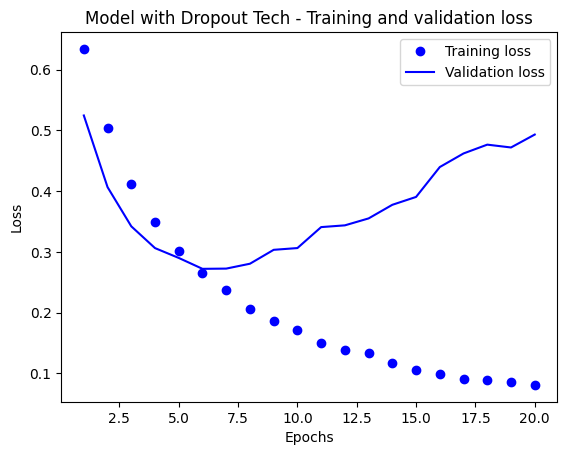

In [77]:
import matplotlib.pyplot as plt
Model_Drp_Tech_dict = Model_Drp_Tech.history
loss_values_Drp = Model_Drp_Tech_dict["loss"]
val_loss_values_Drp = Model_Drp_Tech_dict["val_loss"]
epochs = range(1, len(loss_values_Drp) + 1)
plt.plot(epochs, loss_values_Drp, "bo", label="Training loss")
plt.plot(epochs, val_loss_values_Drp, "b", label="Validation loss")
plt.title("Model with Dropout Tech - Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Plotting Accuracy

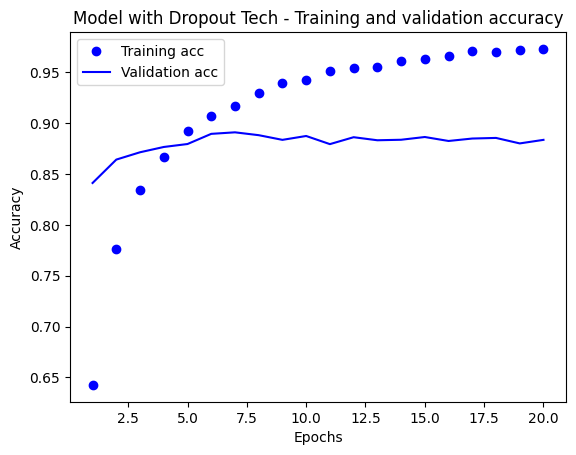

In [78]:
plt.clf()
acc_Drp = Model_Drp_Tech_dict["accuracy"]
val_acc_Drp = Model_Drp_Tech_dict["val_accuracy"]
plt.plot(epochs, acc_Drp, "bo", label="Training acc")
plt.plot(epochs, val_acc_Drp, "b", label="Validation acc")
plt.title("Model with Dropout Tech - Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Retraining

In [79]:
model_drp = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_drp.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_drp.fit(x_train, y_train, epochs=9, batch_size=512) # Epochs selected 9 because it starts to stablize from 9
Model_Drp_Tech_Results = model_drp.evaluate(x_test, y_test)

Epoch 1/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5986 - loss: 0.6486
Epoch 2/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8104 - loss: 0.4530
Epoch 3/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8641 - loss: 0.3534
Epoch 4/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8914 - loss: 0.3024
Epoch 5/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9115 - loss: 0.2605
Epoch 6/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9222 - loss: 0.2285
Epoch 7/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9291 - loss: 0.2042
Epoch 8/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9338 - loss: 0.1918
Epoch 9/9
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9441 - loss: 0.1692
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8801 - loss: 0.3476


In [80]:
Model_Drp_Tech_Results

[0.34530577063560486, 0.8808799982070923]

Prediction

In [81]:
model_drp.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.0659391 ],
       [0.99999547],
       [0.97229147],
       ...,
       [0.0541455 ],
       [0.03409726],
       [0.48702636]], dtype=float32)

**Comparison of the Models**



Fetching the training history for all models

In [82]:
Base_model_dict = Base_model.history
Base_model_dict.keys()

Model_1_Hidden_Layer_dict = Model_1_Hidden_Layer.history
Model_1_Hidden_Layer_dict.keys()

Model_3_Hidden_Layer_dict = Model_3_Hidden_Layer.history
Model_3_Hidden_Layer_dict.keys()

Model_32_Hidden_Units_dict = Model_32_Hidden_Units.history
Model_32_Hidden_Units_dict.keys()

Model_64_Hidden_Units_dict = Model_64_Hidden_Units.history
Model_64_Hidden_Units_dict.keys()

Model_MSE_LOSS_dict = Model_MSE_LOSS.history
Model_MSE_LOSS_dict.keys()

Model_TANH_ACT_dict = Model_TANH_ACT.history
Model_TANH_ACT_dict.keys()

Model_Reg_Tech_dict = Model_Reg_Tech.history
Model_Reg_Tech_dict.keys()

Model_Drp_Tech_dict = Model_Drp_Tech.history
Model_Drp_Tech_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Question 1 - Comparing Hidden layers with Base Model


Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


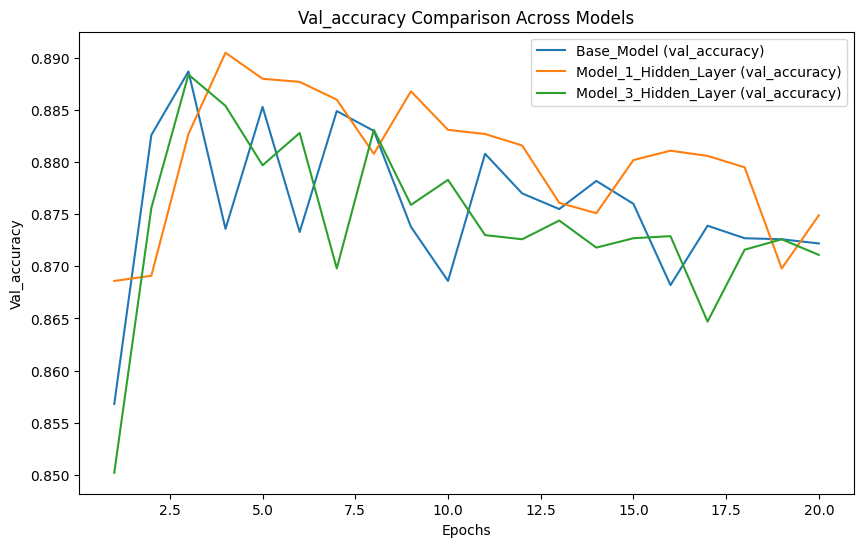

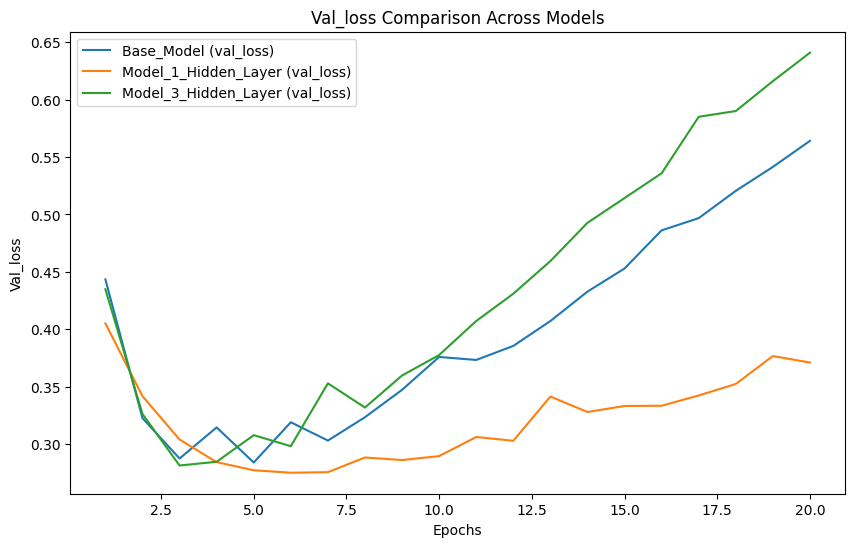

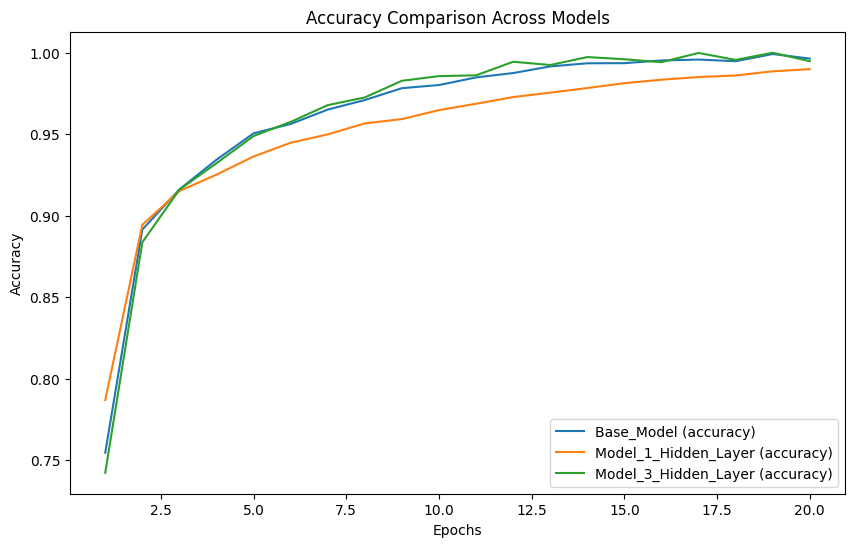

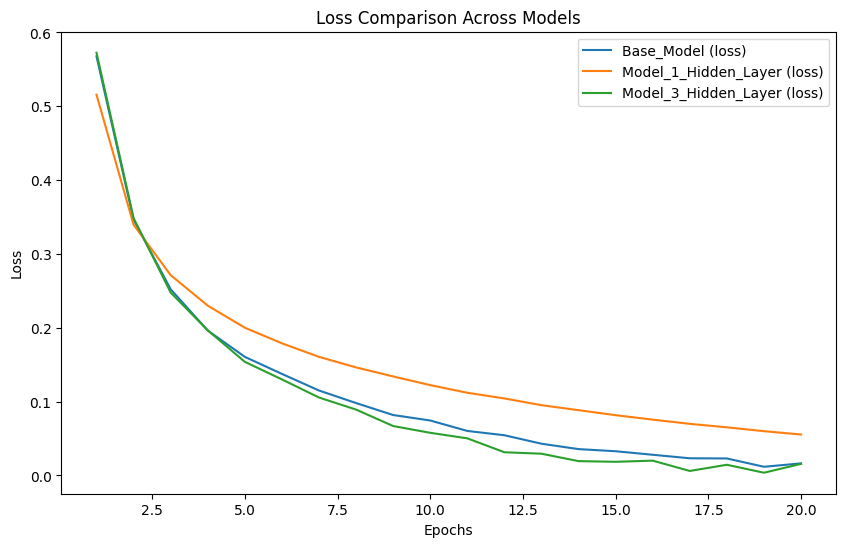

In [83]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_Hidden_Layer,
    "Model_3_Hidden_Layer": Model_3_Hidden_Layer,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 2 - Comparing Base model with Hidden Units value of 16, 32 and 64

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


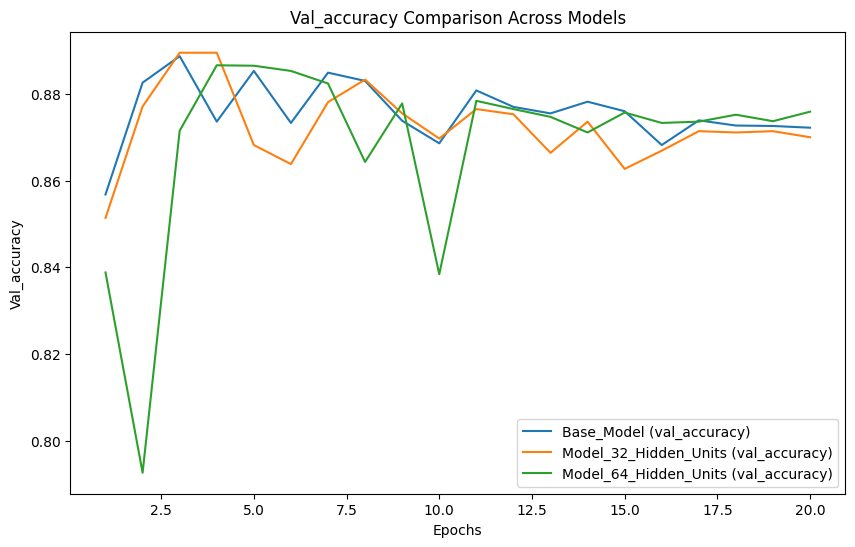

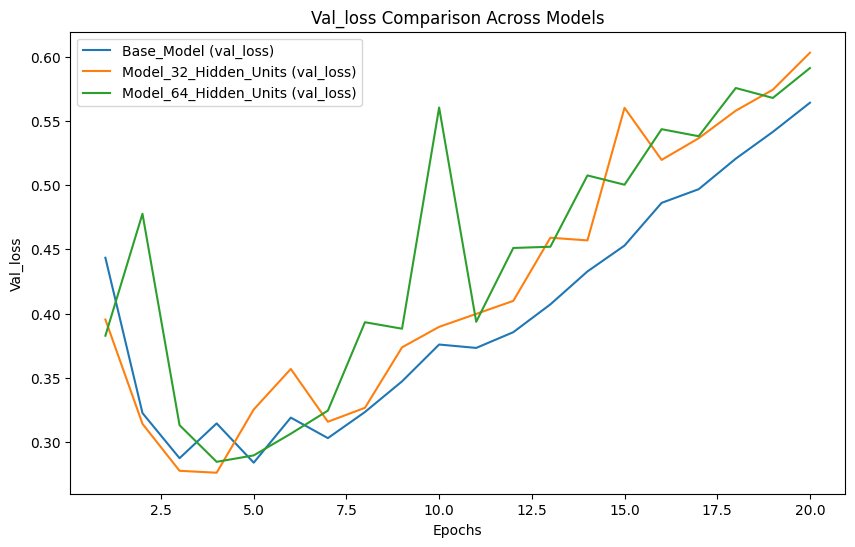

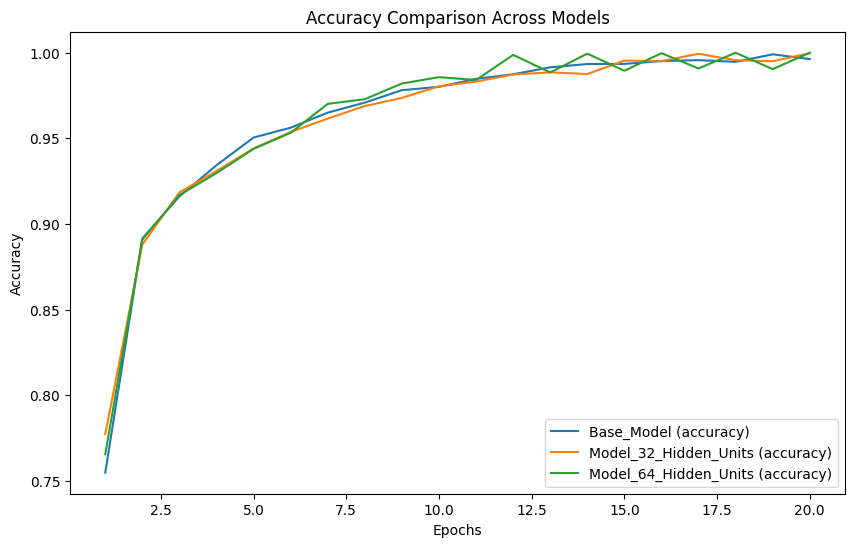

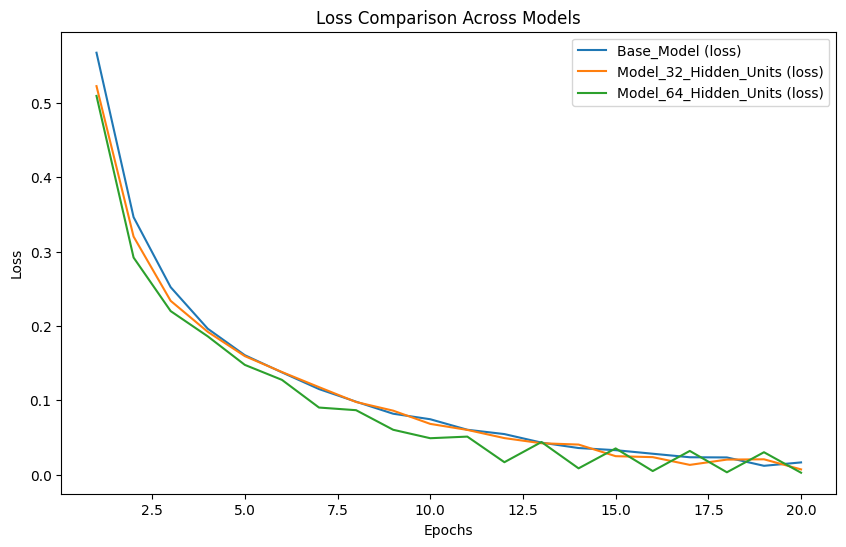

In [84]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_32_Hidden_Units": Model_32_Hidden_Units,
    "Model_64_Hidden_Units": Model_64_Hidden_Units,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 3 - MSE loss function

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


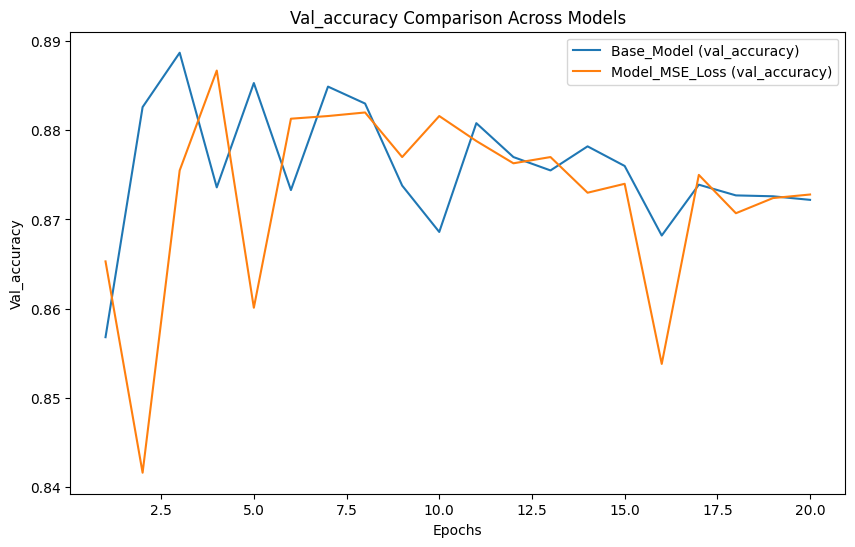

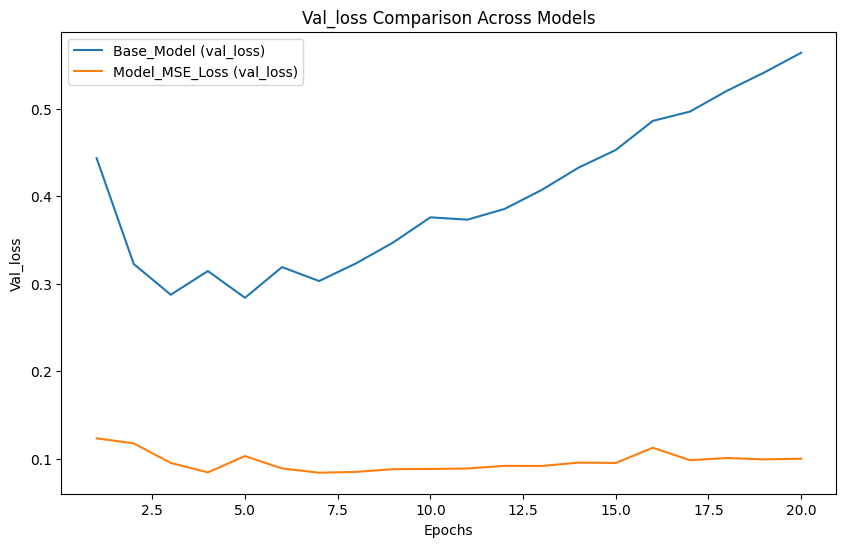

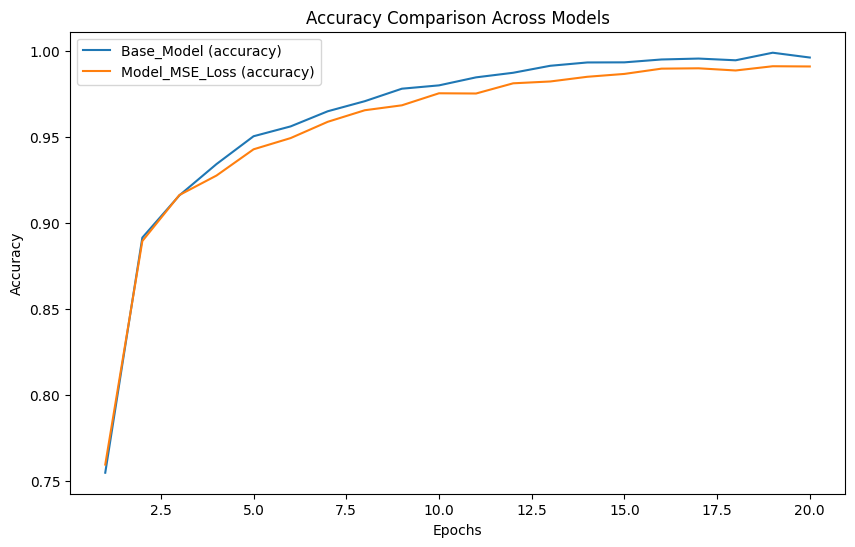

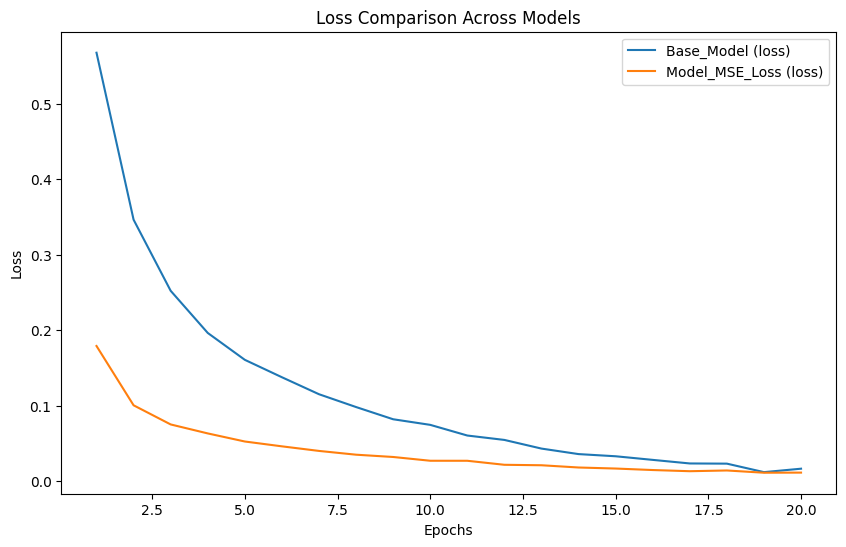

In [85]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_MSE_Loss": Model_MSE_LOSS,
 }

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 4 - Comparing Tanh activation with base model which has relu activation function

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


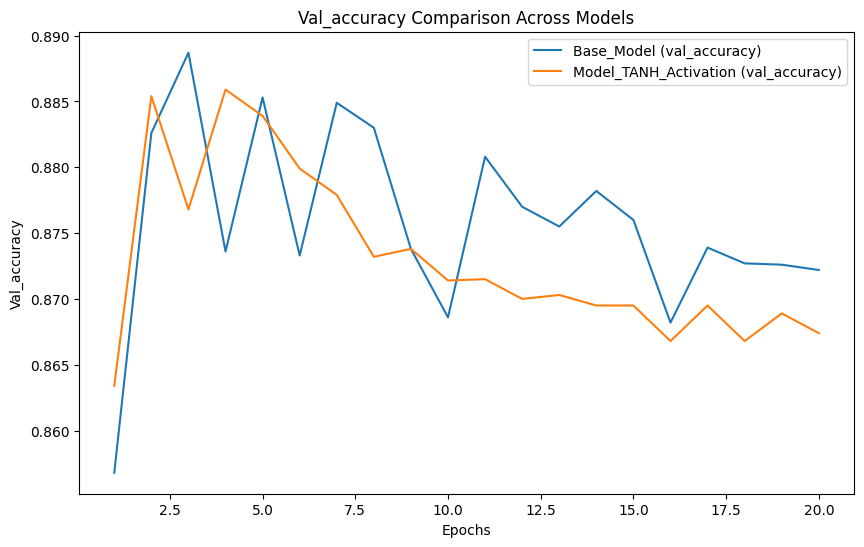

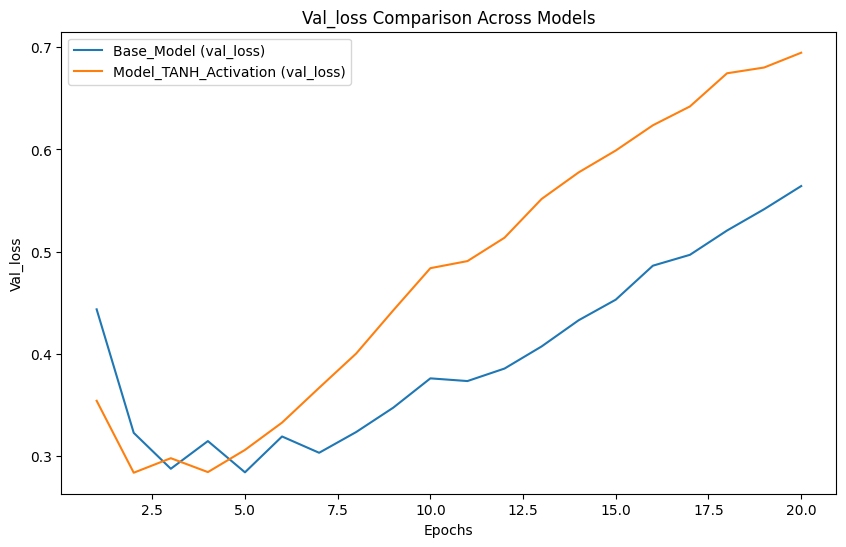

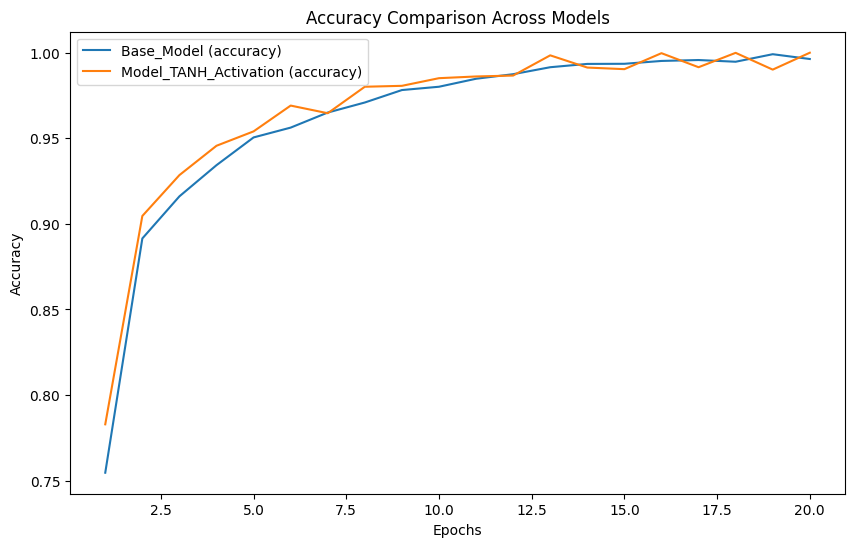

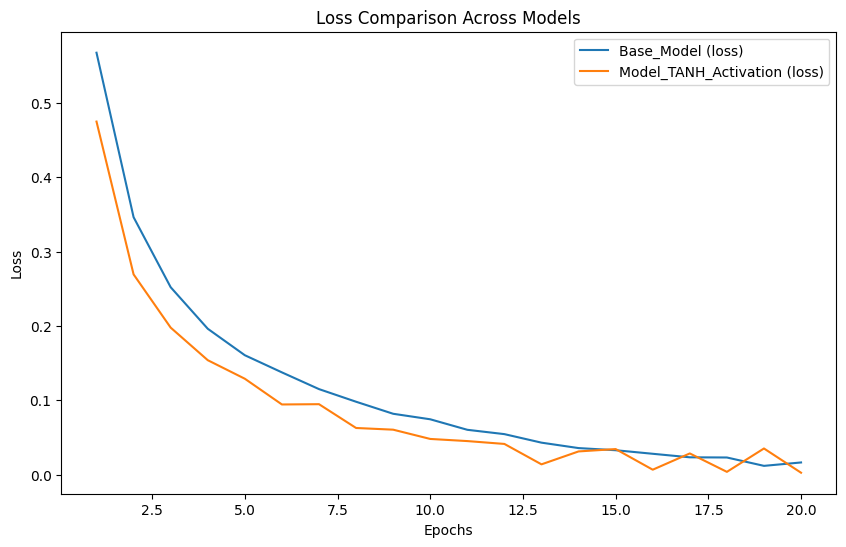

In [86]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_TANH_Activation": Model_TANH_ACT,
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Question 5 - Comparison of L2 regularization, Dropout and Base model

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


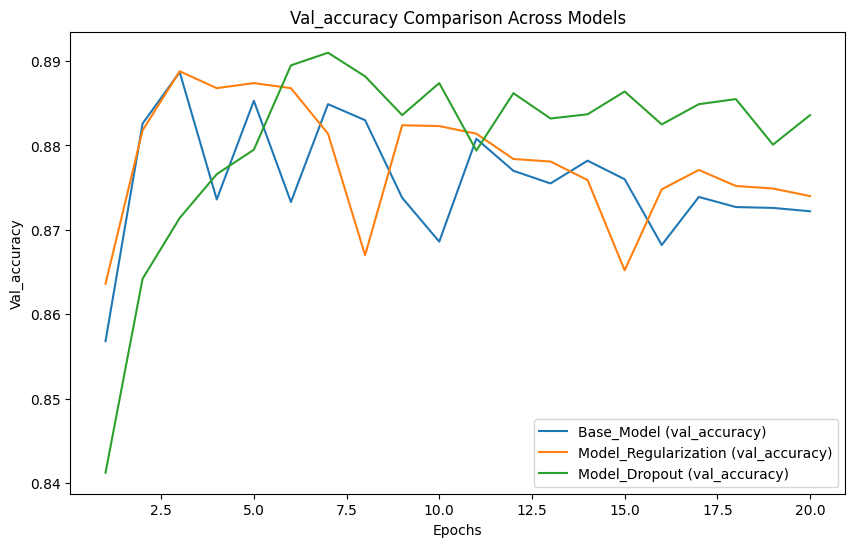

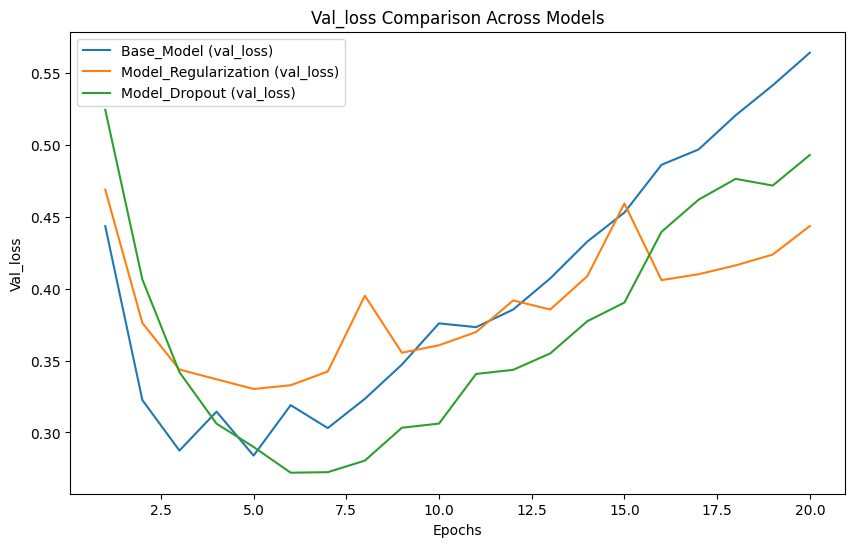

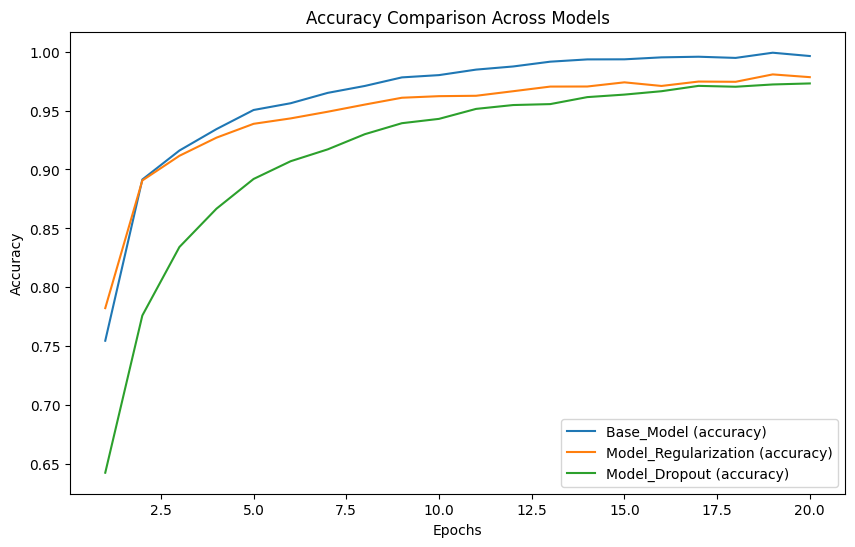

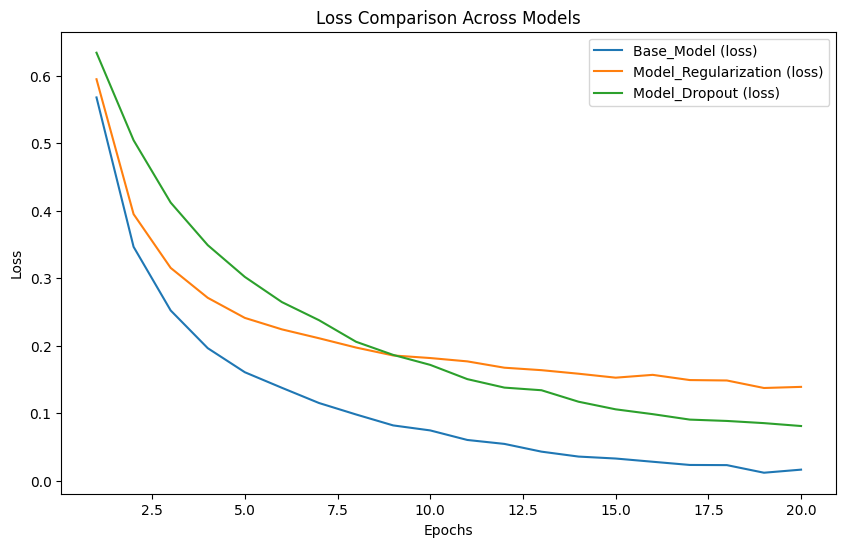

In [87]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')

Comparing all the models

Base_Model history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_1_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_3_Hidden_Layer history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_32_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_64_Hidden_Units history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_MSE_Loss history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_TANH_Activation history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Regularization history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Model_Dropout history keys: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


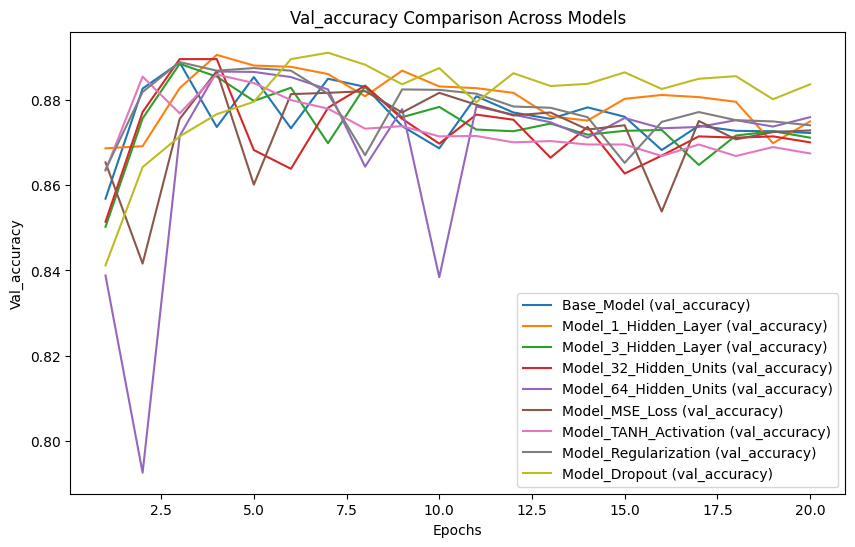

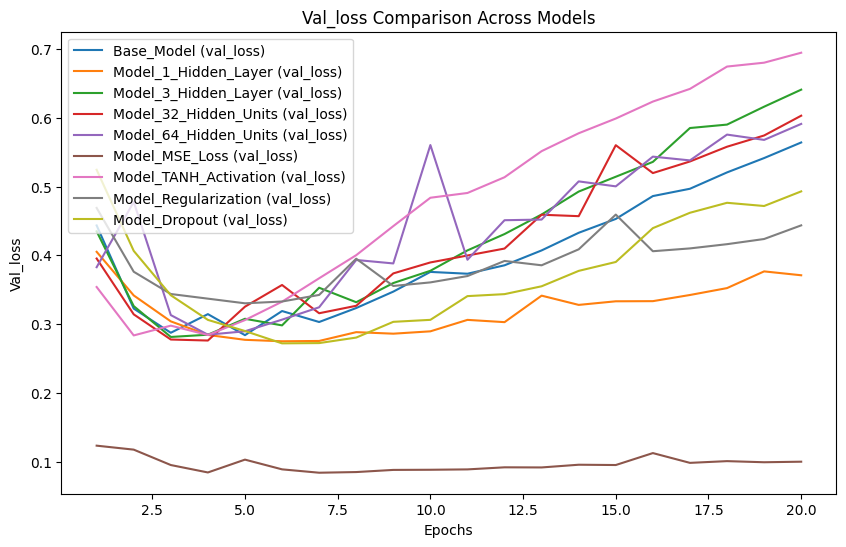

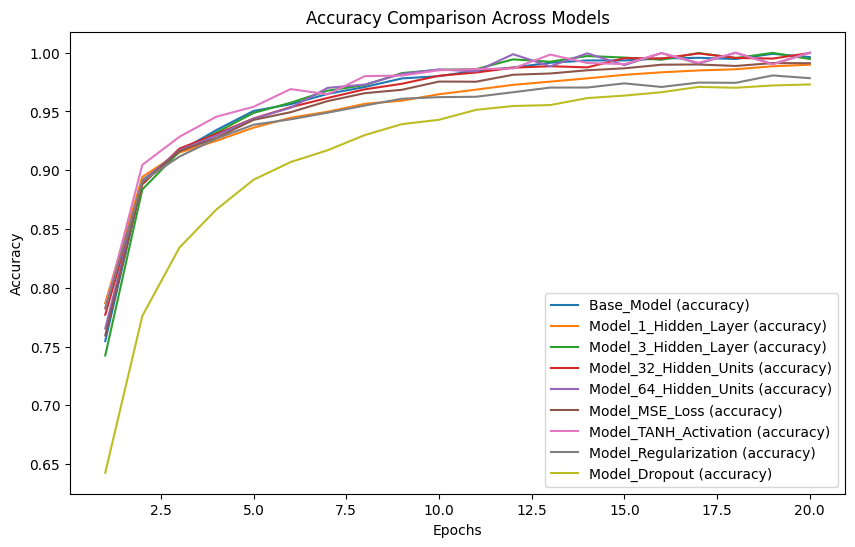

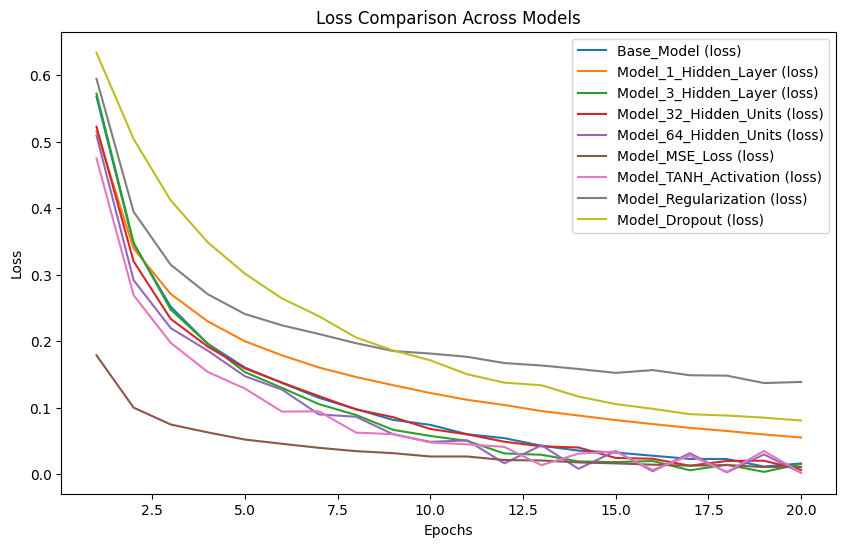

In [88]:
import matplotlib.pyplot as plt

# Dictionary of models and their histories
model_histories = {
    "Base_Model": Base_model,
    "Model_1_Hidden_Layer": Model_1_Hidden_Layer,
    "Model_3_Hidden_Layer": Model_3_Hidden_Layer,
    "Model_32_Hidden_Units": Model_32_Hidden_Units,
    "Model_64_Hidden_Units": Model_64_Hidden_Units,
    "Model_MSE_Loss": Model_MSE_LOSS,
    "Model_TANH_Activation": Model_TANH_ACT,
    "Model_Regularization": Model_Reg_Tech,
    "Model_Dropout": Model_Drp_Tech
}

# Extract and display keys of histories
for model_name, model in model_histories.items():
    history_dict = model.history
    print(f"{model_name} history keys: {history_dict.keys()}")

# Function to plot training and validation accuracy/loss across models
def plot_metrics(metric):
    plt.figure(figsize=(10, 6))
    for model_name, model in model_histories.items():
        metric_values = model.history[metric]
        plt.plot(range(1, len(metric_values) + 1), metric_values, label=f"{model_name} ({metric})")

    plt.title(f'{metric.capitalize()} Comparison Across Models')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

# Plot validation accuracy
plot_metrics('val_accuracy')

# Plot validation loss
plot_metrics('val_loss')

plot_metrics('accuracy')

plot_metrics('loss')


| Model    | Test Loss | Test Accuracy |
|----------|-----------|---------------|
| Base Model | 0.29      | 0.88          |
| 1HL      | 0.28      | 0.88          |
| 3HL      | 0.37      | 0.87          |
| 32HU     | 0.29      | 0.88          |
| 64HU     | 0.30      | 0.89          |
| MSE      | 0.09      | 0.88          |
| Tanh     | 0.29      | 0.87          |
| L2       | 0.34      | 0.88          |
| Dropout  | 0.32      | 0.88          |